![](https://images.fastcompany.net/image/upload/w_1280,f_auto,q_auto,fl_lossy/wp-cms/uploads/2019/06/p-2-90369607-see-googleand8217s-six-rules-for-great-data-design.jpg)

Recently I was working on a notebook when I started to realize that these are the same graphs I have been making in my career till now. Never do we pay much focus on good, attractive graphs. At first, I changed the color palette in all the graphs but still they did not seem attractive. Hence I decided to make this notebook to have a better version of the common graphs that we make. 

I have tried to use different versions of matplotlib and seaborn from various sources. You can use according to your wish.
This notebook will keep on growing.
Dont forget to give your suggestions.

We will use [students performance in exams dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

In [1]:
#packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import matplotlib.patches as patches
from matplotlib_venn import venn3

In [2]:
data = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Histogram

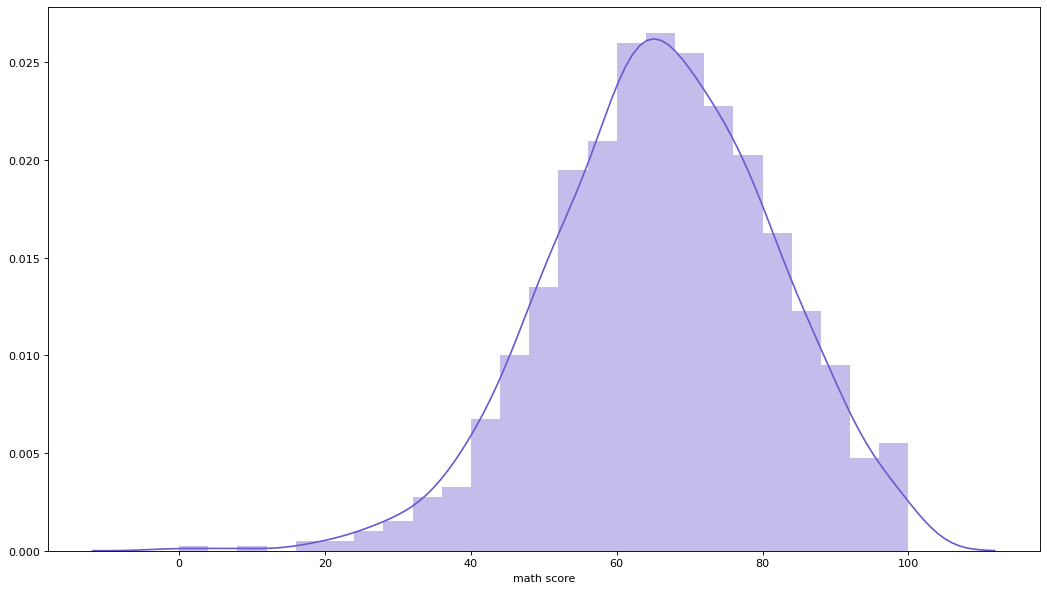

In [4]:
#seaborn
plt.figure(figsize=(16,9), dpi= 80)
sns.set_color_codes()
sns.distplot(data['math score'],color = 'slateblue')
plt.show()

(0.0, 120.0)

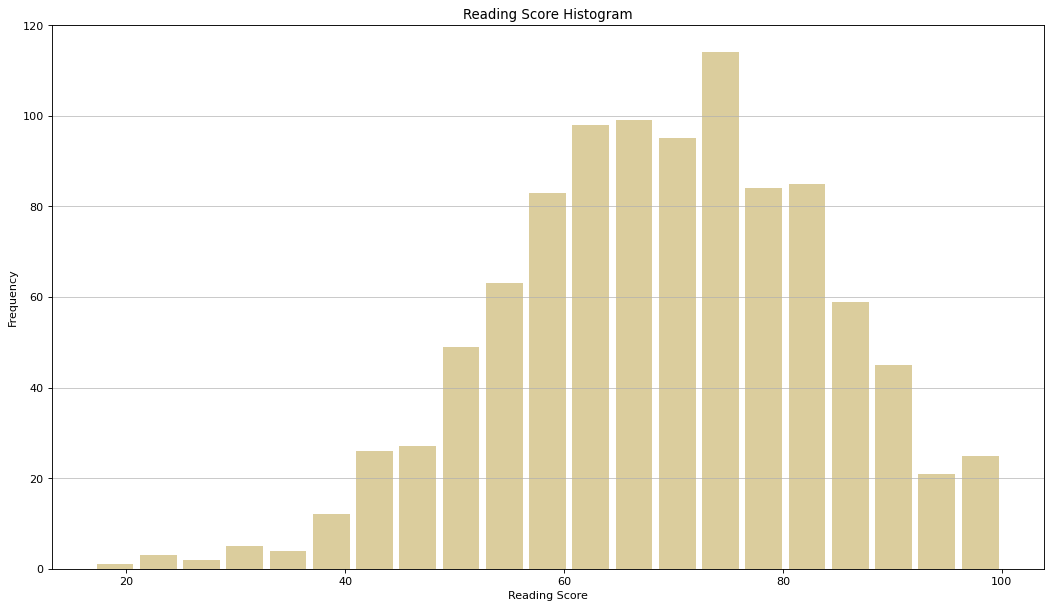

In [5]:
#matplotlib
plt.figure(figsize=(16,9), dpi= 80)
n, bins, patches = plt.hist(x=data['reading score'], bins='auto',
                            color='y',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.title('Reading Score Histogram')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

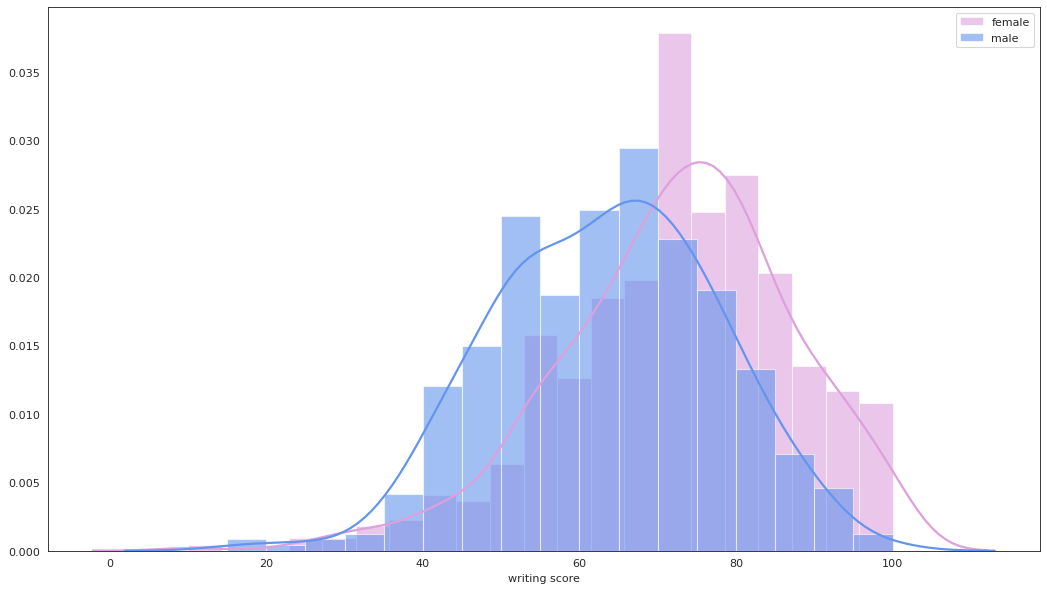

In [6]:
sns.set_style("white")

x1 = data.loc[data.gender=='female', 'writing score']
x2 = data.loc[data.gender=='male', 'writing score']

# Plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(16,9), dpi= 80)
sns.distplot(x1, color="plum", label="female", **kwargs)
sns.distplot(x2, color="cornflowerblue", label="male", **kwargs)
plt.legend()

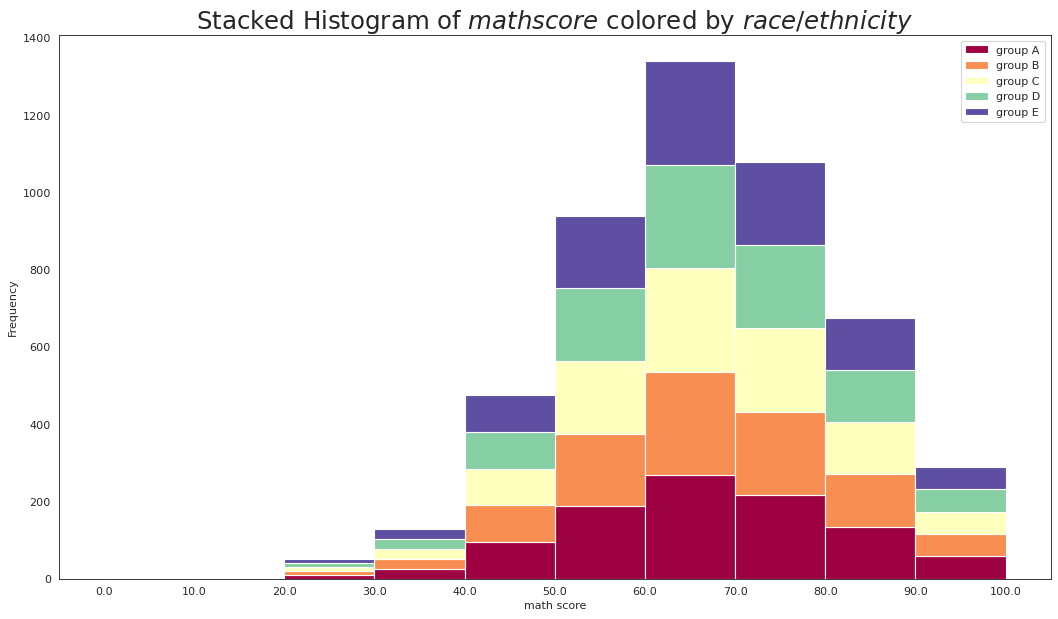

In [7]:
# Prepare data
x_var = 'math score'
groupby_var = 'race/ethnicity'
df_agg = data.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [data[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(data[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.xticks(ticks=bins[::1], labels=[round(b,1) for b in bins[::1]])
plt.show()

# Bar Plot

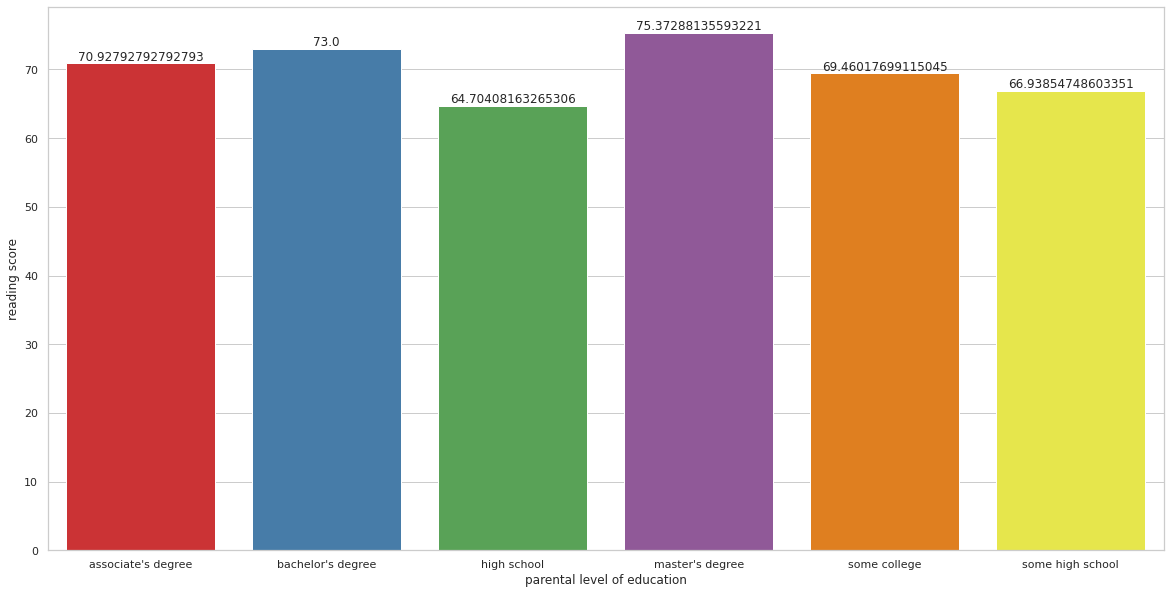

In [8]:
graph = data.groupby(["parental level of education"],as_index = False)['reading score'].mean()
plt.figure(figsize = (20,10))
sns.set(style="whitegrid")
ax = sns.barplot(x="parental level of education", y="reading score", data=graph,palette = 'Set1')
for i, val in enumerate(graph['reading score'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

([<matplotlib.axis.XTick at 0x7f0bd8267f10>,
 [Text(0, 0, 'GROUP A'),
  Text(0, 0, 'GROUP B'),
  Text(0, 0, 'GROUP C'),
  Text(0, 0, 'GROUP D'),
  Text(0, 0, 'GROUP E')])

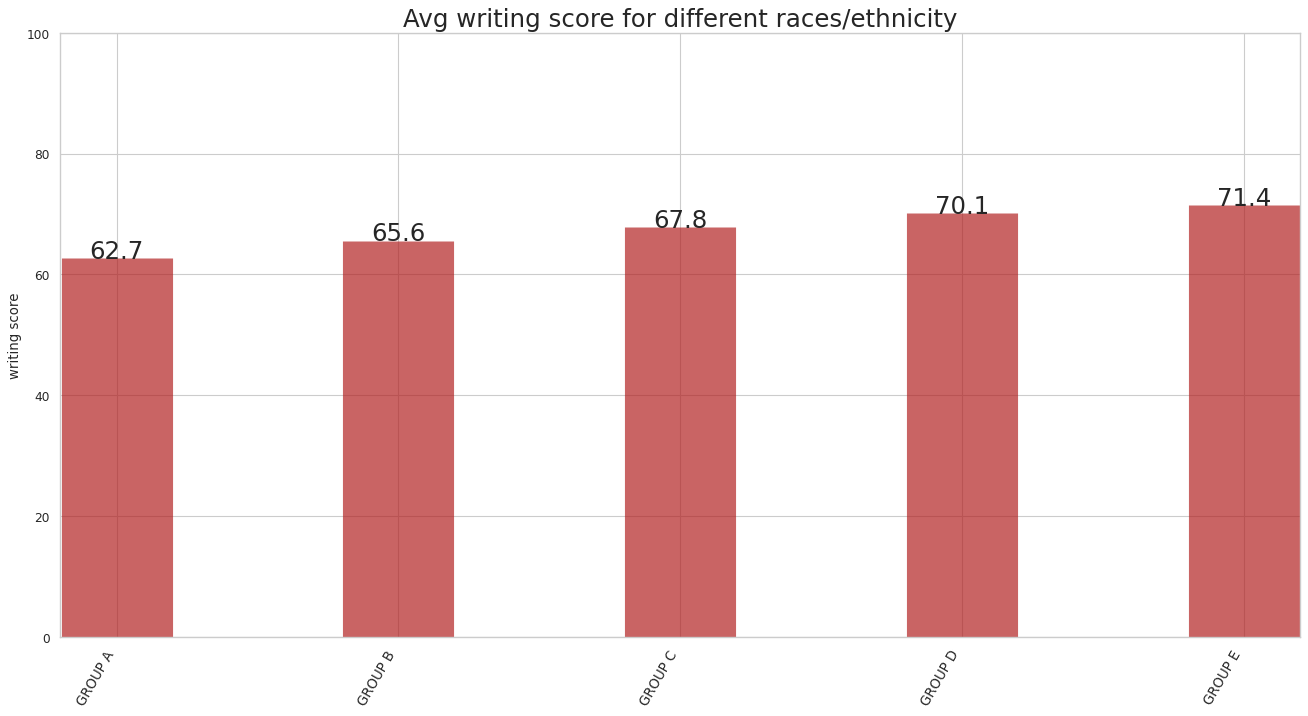

In [9]:
df = data[['writing score', 'race/ethnicity']].groupby('race/ethnicity').apply(lambda x: x.mean())
df.sort_values('writing score', inplace=True)
df.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(20,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df['writing score'], color='firebrick', alpha=0.7, linewidth=100)

# Annotate Text
for i, score in enumerate(df['writing score']):
    ax.text(i, score, round(score, 1), horizontalalignment='center', fontdict={'fontweight':500, 'size':22})


# Title, Label, Ticks and Ylim
ax.set_title('Avg writing score for different races/ethnicity', fontdict={'size':22})
ax.set(ylabel='writing score', ylim=(0, 100))
plt.xticks(df.index, df['race/ethnicity'].str.upper(), rotation=60, horizontalalignment='right', fontsize=12)


A different version for bar plot is lollipop chart. Let us try it.

(0.0, 100.0)

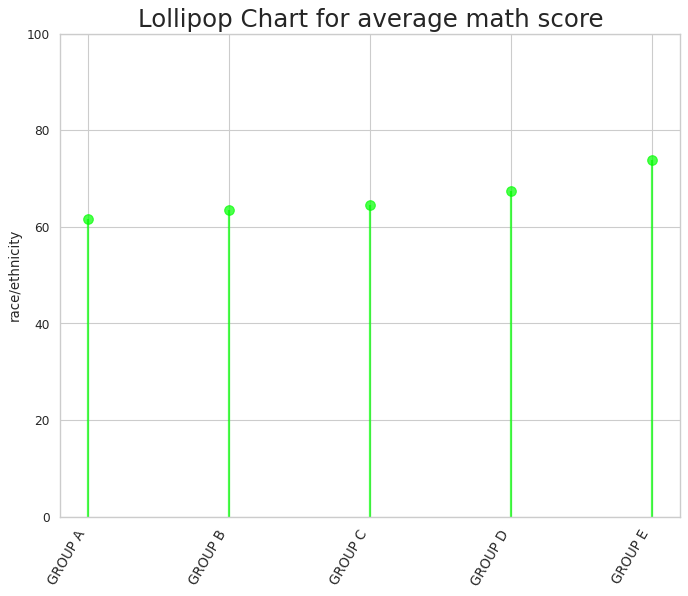

In [10]:
df = data[['math score', 'race/ethnicity']].groupby('race/ethnicity').apply(lambda x: x.mean())
df.sort_values('math score', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(10,8), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df['math score'], color='lime', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df['math score'], s=75, color='lime', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for average math score', fontdict={'size':22})
ax.set_ylabel('race/ethnicity')
ax.set_xticks(df.index)
ax.set_xticklabels(df['race/ethnicity'].str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0,100)

# Pie Chart

Pie charts can be made more attractive by making it like a donut. The logic is simple, we make pie chart and then make a circle in the middle. Let us see how

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


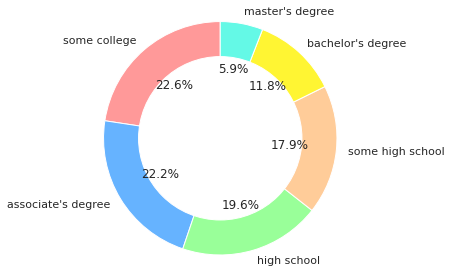

In [11]:
# Pie chart
df = pd.DataFrame(data['parental level of education'].value_counts(normalize=True) * 100)
labels = df.index
sizes = df.values
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fff533','#64f9e6']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Another variation can be done by adding explode to piecharts when you try to focus on some particular category. Let us try that

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # Remove the CWD from sys.path while we load stuff.


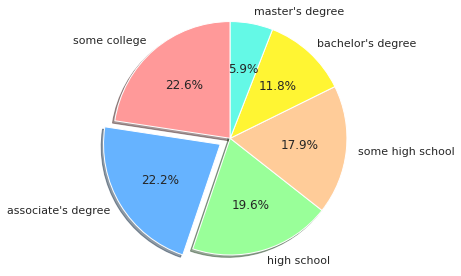

In [12]:
df = pd.DataFrame(data['parental level of education'].value_counts(normalize=True) * 100)
labels = df.index
sizes = df.values
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0, 0,0,0)
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fff533','#64f9e6']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

# Scatter Plot

Scatter Plots are widely used by everyone. Let us try making a little different versions for the same purpose.

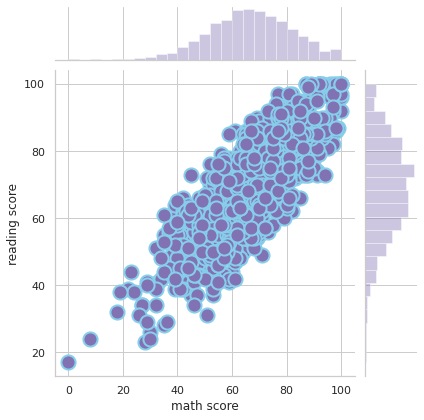

In [13]:
sns.jointplot(x=data["math score"], y=data["reading score"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)

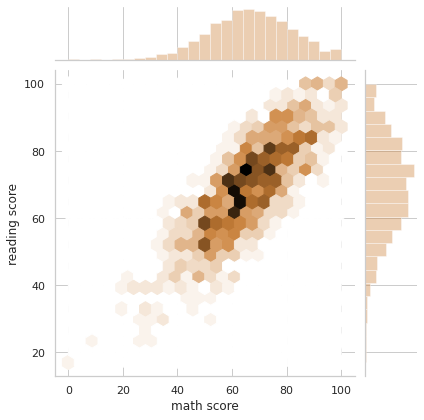

In [14]:
sns.jointplot(x=data["math score"], y=data["reading score"], kind='hex',color='peru')

# Heat Map

In the below map the correlation is defined by the size of the hexagon. You can change the shape by changing the marker in the code

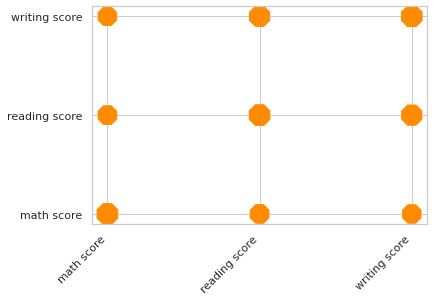

In [15]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='8',
        color = 'darkorange'
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
corr = data.corr()
corr = pd.melt(corr.reset_index(), id_vars='index')
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)